In [2]:
import pandas as pd

In [ ]:
# Please note that and csv files used in this notebook were not provided here and running the notebook will damage outputs

In [ ]:
data_list=[]
columns = ["text_reviews_count", "series", "country_code", "language_code", "popular_shelves", "is_ebook", "average_rating", "similar_books", "format",
          "link", "authors", "publisher", "num_pages", "publication_day", "publication_month","publication_year","url","image_url","book_id", "book_id",
          "ratings_count","work_id","title","title_without_series"]
for i in range(5):
    prefix="intermediate_goodreads_data"
    data = pd.read_csv(f"intermediate_goodreads_data_{i+1}.csv")
    for column in columns:
        data.dropna(subset=[column], inplace=True)

    data_list.append(data)

In [140]:
def concatenate_all_csv_files(all_dfs, final_output_file):   
    
    final_df = pd.concat(all_dfs, ignore_index=True)
    final_df.to_csv(final_output_file, index=False)


final_output_file = 'books_final.csv'

concatenate_all_csv_files(data_list, final_output_file)

In [5]:

data_books = pd.read_csv("books_final.csv")

In [6]:
data_books.isna().sum()

text_reviews_count      0
series                  0
country_code            0
language_code           0
popular_shelves         0
is_ebook                0
average_rating          0
similar_books           0
format                  0
link                    0
authors                 0
publisher               0
num_pages               0
publication_day         0
publication_month       0
publication_year        0
url                     0
image_url               0
book_id                 0
ratings_count           0
work_id                 0
title                   0
title_without_series    0
dtype: int64

In [158]:
data_file.drop(columns=['edition_information'], inplace=True)

In [162]:
data_books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214455 entries, 0 to 224259
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   text_reviews_count    214455 non-null  int64  
 1   series                214455 non-null  object 
 2   country_code          214455 non-null  object 
 3   language_code         214455 non-null  object 
 4   popular_shelves       214455 non-null  object 
 5   is_ebook              214455 non-null  bool   
 6   average_rating        214455 non-null  float64
 7   similar_books         214455 non-null  object 
 8   format                214455 non-null  object 
 9   link                  214455 non-null  object 
 10  authors               214455 non-null  object 
 11  publisher             214455 non-null  object 
 12  num_pages             214455 non-null  float64
 13  publication_day       214455 non-null  float64
 14  publication_month     214455 non-null  float64
 15  publi

In [164]:
data_books.columns

Index(['text_reviews_count', 'series', 'country_code', 'language_code',
       'popular_shelves', 'is_ebook', 'average_rating', 'similar_books',
       'format', 'link', 'authors', 'publisher', 'num_pages',
       'publication_day', 'publication_month', 'publication_year', 'url',
       'image_url', 'book_id', 'ratings_count', 'work_id', 'title',
       'title_without_series'],
      dtype='object')

Transforming date day month and year to int as the type was float

In [7]:
data_books = data_books.astype({"publication_day": int, "publication_month": int, "publication_year":int})

In [8]:
data_books.shape

(214455, 23)

keeping only books with more than 50 pages and also anothe dataframe with books with more than 100 pages

In [9]:
data_books_50=data_books[data_books['num_pages']>50]

In [233]:
data_books_100=data_books[data_books['num_pages']>100]

In [223]:
data_books_50.shape

(189779, 23)

Looking at the correlation matrix it seems that keeping books with more than 50 pages is slightly better than 100

In [234]:
data_books_50[['text_reviews_count', 'num_pages', 'publication_day', 
                  'publication_month', 'publication_year', 'ratings_count', 'average_rating']].corr()

,text_reviews_count,num_pages,publication_day,publication_month,publication_year,ratings_count,average_rating
text_reviews_count,1.000000,0.021837,0.004895,-0.004507,-0.000559,0.776568,0.020728
num_pages,0.021837,1.000000,0.000213,-0.000320,-0.000069,0.012748,0.084004
publication_day,0.004895,0.000213,1.000000,0.003608,0.004354,-0.000588,0.024882
publication_month,-0.004507,-0.000320,0.003608,1.000000,-0.004398,0.000083,0.028665
publication_year,-0.000559,-0.000069,0.004354,-0.004398,1.000000,-0.001311,0.007771
ratings_count,0.776568,0.012748,-0.000588,0.000083,-0.001311,1.000000,0.021128
average_rating,0.020728,0.084004,0.024882,0.028665,0.007771,0.021128,1.000000


In [235]:
data_books_100[['text_reviews_count', 'num_pages', 'publication_day', 
                  'publication_month', 'publication_year', 'ratings_count', 'average_rating']].corr()

,text_reviews_count,num_pages,publication_day,publication_month,publication_year,ratings_count,average_rating
text_reviews_count,1.000000,0.019311,0.004879,-0.004781,-0.000571,0.776171,0.019698
num_pages,0.019311,1.000000,0.000295,0.002029,-0.000808,0.012045,0.078576
publication_day,0.004879,0.000295,1.000000,0.002602,0.004180,-0.000637,0.027562
publication_month,-0.004781,0.002029,0.002602,1.000000,-0.004622,0.000105,0.029384
publication_year,-0.000571,-0.000808,0.004180,-0.004622,1.000000,-0.001238,0.008048
ratings_count,0.776171,0.012045,-0.000637,0.000105,-0.001238,1.000000,0.020468
average_rating,0.019698,0.078576,0.027562,0.029384,0.008048,0.020468,1.000000


Now that we keep only the books with a reasolable publication year that mean between 1800 and 2024

In [13]:
data_books_50_year_2024 = data_books_50[data_books_50['publication_year']<2025]

In [286]:
data_books_50_year_2024[['text_reviews_count', 'num_pages', 'publication_day', 
                  'publication_month', 'publication_year', 'ratings_count', 'average_rating']].corr()

,text_reviews_count,num_pages,publication_day,publication_month,publication_year,ratings_count,average_rating
text_reviews_count,1.000000,0.021833,0.004908,-0.004506,-0.002262,0.776568,0.020750
num_pages,0.021833,1.000000,0.000258,-0.000304,0.007837,0.012746,0.084226
publication_day,0.004908,0.000258,1.000000,0.003466,0.166595,-0.000583,0.024987
publication_month,-0.004506,-0.000304,0.003466,1.000000,-0.017797,0.000085,0.028665
publication_year,-0.002262,0.007837,0.166595,-0.017797,1.000000,-0.024796,0.038638
ratings_count,0.776568,0.012746,-0.000583,0.000085,-0.024796,1.000000,0.021173
average_rating,0.020750,0.084226,0.024987,0.028665,0.038638,0.021173,1.000000


In [14]:
data_books_50_year_2024 = data_books_50_year_2024[data_books_50_year_2024['publication_year']>1800]

First we have decided to keep popular shelves as the genre but since there was a lot of info in there we decided for each to keep only the most represented ones 
- PS : later we will download more json files for genre and append them because this method was not relevant

In [16]:
import pandas as pd
import json

def extract_top_genres(shelves_str):
    shelves = json.loads(shelves_str.replace("'", '"'))
    filtered_shelves = [shelf for shelf in shelves if shelf['name'] not in ['to-read', 'currently-reading', 'to-buy', 'owned', 'favorites', 'read-manga'
                                                                            'first-reads','already-purchased','e-books-to-read']]
    sorted_shelves = sorted(filtered_shelves, key=lambda x: int(x['count']), reverse=True)
    top_genres = [shelf['name'] for shelf in sorted_shelves[:3]]
    return ', '.join(top_genres)

def merge_duplicate_titles(df):
    df['genre'] = df['popular_shelves'].apply(extract_top_genres)


    df_merged = df.copy().groupby('title').agg({
        'text_reviews_count': 'first',
        'series': 'first',
        'country_code': 'first',
        'language_code': 'first',
        'popular_shelves': 'first',
        'is_ebook': 'first',
        'average_rating': 'first',
        'similar_books': 'first',
        'format': 'first',
        'link': 'first',
        'authors': 'first',      
        'publisher': 'first',
        'num_pages': 'first',
        'publication_day': 'first',
        'publication_month': 'first',
        'publication_year': 'first',
        'url': 'first',
        'image_url': 'first',
        'book_id': 'first',
        'ratings_count': 'first',
        'work_id': 'first',
        'title_without_series': 'first',
        'genre': lambda x: ', '.join(set(', '.join(x).split(', ')))
    }).reset_index()
    
    return df_merged


# Merge duplicate titles and concatenate genres
merged_data = merge_duplicate_titles(data_books_50_year_2024)

In [305]:
merged_data[['text_reviews_count', 'num_pages', 'publication_day', 
                  'publication_month', 'publication_year', 'ratings_count', 'average_rating']].corr()

,text_reviews_count,num_pages,publication_day,publication_month,publication_year,ratings_count,average_rating
text_reviews_count,1.000000,0.021308,0.002456,-0.005919,-0.001437,0.711748,0.024181
num_pages,0.021308,1.000000,-0.002662,0.001367,0.003058,0.013510,0.083519
publication_day,0.002456,-0.002662,1.000000,0.003504,0.168761,-0.005995,0.026854
publication_month,-0.005919,0.001367,0.003504,1.000000,-0.013909,-0.001178,0.027580
publication_year,-0.001437,0.003058,0.168761,-0.013909,1.000000,-0.033746,0.049712
ratings_count,0.711748,0.013510,-0.005995,-0.001178,-0.033746,1.000000,0.029698
average_rating,0.024181,0.083519,0.026854,0.027580,0.049712,0.029698,1.000000


## We can see that we don't have author names only there ids so we will download athor json dataset and extract authors informations

Top 10 Authors by Average Rating:
authors
[{'author_id': '17146284', 'role': ''}]                                                     5.00
[{'author_id': '7035188', 'role': ''}]                                                      5.00
[{'author_id': '6914681', 'role': ''}]                                                      5.00
[{'author_id': '8317252', 'role': ''}, {'author_id': '8317253', 'role': ''}]                4.97
[{'author_id': '15808293', 'role': ''}]                                                     4.96
[{'author_id': '2875375', 'role': ''}]                                                      4.90
[{'author_id': '7372367', 'role': ''}]                                                      4.88
[{'author_id': '193582', 'role': ''}, {'author_id': '7804917', 'role': 'Illustrations'}]    4.88
[{'author_id': '697811', 'role': ''}]                                                       4.86
[{'author_id': '8344670', 'role': ''}]                                               

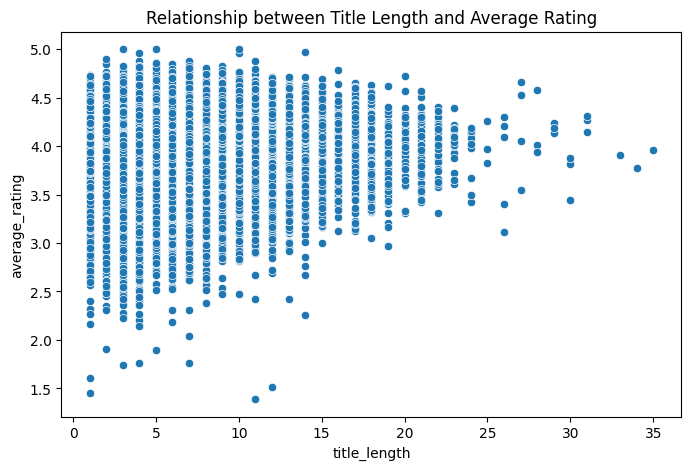

In [364]:
df = merged_data.copy()
# Frequency of authors and their average ratings
author_ratings = df.groupby('authors')['average_rating'].mean().sort_values(ascending=False)
print("Top 10 Authors by Average Rating:")
print(author_ratings.head(10))

# Analysis on book titles - Extracting length of titles
df['title_length'] = df['title'].apply(lambda x: len(str(x).split()))

# Relationship between title length and average rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['title_length'], y=df['average_rating'])
plt.title('Relationship between Title Length and Average Rating')
plt.show()


In [30]:
merged_data["authors"]

0                    [{'author_id': '8180666', 'role': ''}]
1                     [{'author_id': '243489', 'role': ''}]
2                    [{'author_id': '2525338', 'role': ''}]
3                     [{'author_id': '713466', 'role': ''}]
4         [{'author_id': '7338076', 'role': ''}, {'autho...
                                ...                        
154508                [{'author_id': '784067', 'role': ''}]
154509                [{'author_id': '784067', 'role': ''}]
154510                [{'author_id': '784067', 'role': ''}]
154511               [{'author_id': '6884019', 'role': ''}]
154512    [{'author_id': '3344613', 'role': ''}, {'autho...
Name: authors, Length: 154513, dtype: object

In [29]:
merged_data=merged_data.drop("image_url", axis=1)

In [53]:
df = merged_data.copy()

In [37]:
import json
json_file_path=r".\genre\goodreads_book_authors\goodreads_book_authors.json"

authors_dict = {}


# Open the file
with open(json_file_path, 'r') as file:
    for line in file:
        # Parse the JSON object
        data = json.loads(line)
        
        # Extract the required details
        author_id = data['author_id']
        authors_dict[author_id] = {
            'name': data['name'],
            'average_rating': data['average_rating'],
            'text_reviews_count': data['text_reviews_count'],
            'ratings_count': data['ratings_count']
        }



In [38]:
authors_dict

{'604031': {'name': 'Ronald J. Fields',
  'average_rating': '3.98',
  'text_reviews_count': '7',
  'ratings_count': '49'},
 '626222': {'name': 'Anita Diamant',
  'average_rating': '4.08',
  'text_reviews_count': '28716',
  'ratings_count': '546796'},
 '10333': {'name': 'Barbara Hambly',
  'average_rating': '3.92',
  'text_reviews_count': '5075',
  'ratings_count': '122118'},
 '9212': {'name': 'Jennifer Weiner',
  'average_rating': '3.68',
  'text_reviews_count': '36262',
  'ratings_count': '888522'},
 '149918': {'name': 'Nigel Pennick',
  'average_rating': '3.82',
  'text_reviews_count': '96',
  'ratings_count': '1740'},
 '3041852': {'name': 'Alfred J. Church',
  'average_rating': '3.89',
  'text_reviews_count': '85',
  'ratings_count': '947'},
 '215594': {'name': 'Michael Halberstam',
  'average_rating': '4.17',
  'text_reviews_count': '6',
  'ratings_count': '23'},
 '19158': {'name': 'Rachel Roberts',
  'average_rating': '4.18',
  'text_reviews_count': '486',
  'ratings_count': '1367

In [68]:
df=df.drop("work_id", axis=1)

In [54]:
# here we keep only the authors id instead of the json format it was in
def extract_author_id(authors):
    try:
        # Ensuring the string is properly formatted for JSON parsing
        authors_list = json.loads(authors.replace("'", '"'))
        return authors_list[0]['author_id']
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        return None

# Applying the function to create a new column with author_id
df['author_id'] = df['authors'].apply(extract_author_id)

# Droping rows with None author_id
df = df.dropna(subset=['author_id'])

# Mapping the details from the dictionary to new columns
df['authors_name'] = df['author_id'].map(lambda x: authors_dict.get(x, {}).get('name'))
df['authors_average_rating'] = df['author_id'].map(lambda x: authors_dict.get(x, {}).get('average_rating'))
df['authors_text_reviews_count'] = df['author_id'].map(lambda x: authors_dict.get(x, {}).get('text_reviews_count'))
df['authors_ratings_count'] = df['author_id'].map(lambda x: authors_dict.get(x, {}).get('ratings_count'))

# Droping the temporary author_id column 
df.drop(columns=['author_id'], inplace=True)

Error decoding JSON: Expecting ',' delimiter: line 1 column 123 (char 122)
Error decoding JSON: Expecting ',' delimiter: line 1 column 228 (char 227)
Error decoding JSON: Expecting ',' delimiter: line 1 column 128 (char 127)
Error decoding JSON: Expecting ',' delimiter: line 1 column 169 (char 168)
Error decoding JSON: Expecting ',' delimiter: line 1 column 83 (char 82)
Error decoding JSON: Expecting ',' delimiter: line 1 column 83 (char 82)
Error decoding JSON: Expecting ',' delimiter: line 1 column 37 (char 36)
Error decoding JSON: Expecting ',' delimiter: line 1 column 78 (char 77)
Error decoding JSON: Expecting ',' delimiter: line 1 column 41 (char 40)
Error decoding JSON: Expecting ',' delimiter: line 1 column 35 (char 34)


## Here we can see that keeping popular shelves as genre was not a good idea as it  has some keyword like homeschool or kindle ... that are not genres

In [70]:
for genre in df.genre.unique(): print(genre)

first-reads, mystery, netgalley
kids, homeschool, kindle-book
cozy-mystery, kindle, mystery
football, sports, non-fiction
non-fiction, biography, finnish
sue-grafton, non-fiction, mystery
true-crime, kindle, non-fiction
true-crime, crime, non-fiction
mystery, heather-graham, paranormal
cancer, kindle, memoir
nonfiction, non-fiction, memoir
revolutionary-war, military-history, american-history
ahora, cómics, art
fiction, childrens, mystery
classics, short-stories, for-school
history, texas, american-civil-war
history, nonfiction, non-fiction
history, china, chinese-history
non-fiction, young-adult, default
fiction, middle-grade, mystery
historical-fiction, young-adult, ya
fiction, young-adult, mystery
anthology, romance, mystery
biographie, sub, biography
parenting, cookbooks, psychology
sport, non-fiction, biography
read-soon, to-read-owned, mystery
comedy, comic, indonesian
feminism, non-fiction, memoir
finished, sample-this, fiction-and-other
2018, 2018-release, 2018-releases
reviewe

In [73]:
df.columns

Index(['title', 'text_reviews_count', 'country_code', 'language_code',
       'is_ebook', 'average_rating', 'format', 'link', 'publisher',
       'num_pages', 'publication_day', 'publication_month', 'publication_year',
       'url', 'book_id', 'ratings_count', 'genre', 'authors_name',
       'authors_average_rating', 'authors_text_reviews_count',
       'authors_ratings_count'],
      dtype='object')

### we have dowloaded some genres json dataset and we will map this information to our dataset first the idea was to map using book_id but because the result was not coherent we have decided to map them using the link and we got better outcome

In [ ]:
df_2 = df.copy()

In [99]:
json_files = {
    'json/goodreads_books_children.json': 'is_children',
    'json/goodreads_books_comics_graphic.json': 'is_comic',
    'json/goodreads_books_fantasy_paranormal.json': 'is_fantasy_paranormal',
    'json/goodreads_books_history_biography.json': 'is_history_biography',
    'json/goodreads_books_mystery_thriller_crime.json': 'is_mystery_thriller_crime',
    'json/goodreads_books_poetry.json': 'is_poetry',
    'json/goodreads_books_romance.json': 'is_romance',
    'json/goodreads_books_young_adult.json': 'is_young_adult'
}

# Function to load book_ids from a JSON file
def load_links(json_file):
    links = set()
    with open(json_file, 'r') as file:
        for line in file:
            data = json.loads(line)
            links.add(data['link'])
    return links

# Loading link  from each JSON file and store in a dictionary 
links_dict = {json_file: load_links(json_file) for json_file in json_files}

# Add columns to the DataFrame to indicate if the link exists in each JSON file
for json_file, column_name in json_files.items():
    df_2[column_name] = df_2['link'].apply(lambda x: 1 if x in links_dict[json_file] else 0)

In [104]:
df_2.head(10)

,title,text_reviews_count,country_code,language_code,is_ebook,average_rating,format,link,publisher,num_pages,...,authors_text_reviews_count,authors_ratings_count,is_children,is_comic,is_fantasy_paranormal,is_history_biography,is_mystery_thriller_crime,is_poetry,is_romance,is_young_adult
0,"""A"" IS FOR THE ALCHEMIST",8,US,eng,False,4.33,Paperback,https://www.goodreads.com/book/show/22007198-a...,James Larson,266.0,...,8,12,1,0,0,0,1,0,0,0
1,"""A"" Things (A to Z Things #1)",2,US,eng,True,3.00,Kindle Edition,https://www.goodreads.com/book/show/25589071-a...,R. Barri Flowers,52.0,...,198,1289,1,0,0,0,0,0,0,0
2,"""A"" is for Asshat",1,US,eng,False,3.81,Paperback,https://www.goodreads.com/book/show/27393525-a...,MMP,348.0,...,3751,37467,0,0,0,0,1,0,0,0
3,"""Dirty Northern Bastards!"" And Other Tales fro...",4,US,en-GB,False,3.54,Paperback,https://www.goodreads.com/book/show/22819190-d...,Elliott & Thompson Limited,244.0,...,944,8780,0,0,0,1,0,0,0,0
4,"""Et muuten tätäkään usko..."" - Ville Haapasalo...",24,US,fin,False,3.55,Hardcover,https://www.goodreads.com/book/show/23255961-e...,Docendo Oy,216.0,...,76,764,0,0,0,1,0,0,0,0
5,"""G"" is for Grafton: The World of Kinsey Millho...",13,US,eng,False,3.81,Paperback,https://www.goodreads.com/book/show/824349._G_...,Holt Paperbacks,480.0,...,21,204,0,0,0,0,1,0,0,0
6,"""He Killed Our Janny:"" A Family's Search for t...",6,US,eng,True,3.70,Kindle Edition,https://www.goodreads.com/book/show/17818338-h...,Jaks Golden Knights,236.0,...,16,158,0,0,0,0,1,0,0,0
7,"""I Heard You Paint Houses"": Frank ""The Irishma...",185,US,eng,False,4.08,Paperback,https://www.goodreads.com/book/show/934378._I_...,Steerforth,320.0,...,255,2891,0,0,0,0,1,0,0,0
8,"""Il cuore del male"" (Krewe of Hunters, #2)",1,US,ita,False,3.98,Paperback,https://www.goodreads.com/book/show/26815292-i...,Harlequin Mondadori,315.0,...,15986,213427,0,0,1,0,1,0,1,0
9,"""It's Cancer""",12,US,en-US,False,3.80,Paperback,https://www.goodreads.com/book/show/15761403-i...,Outskirts Press,151.0,...,16,134,0,0,0,1,0,0,0,0


In [102]:
# renaming the genre to popular shleves 
df_2.rename(columns={'genre': 'popular_shelves'}, inplace=True)

In [120]:
# making sure the columns have the correct type
df_2 = df_2.astype({"num_pages": int, "country_code": str, "language_code": str, "authors_ratings_count":int})

In [117]:
df_2.columns

Index(['title', 'text_reviews_count', 'country_code', 'language_code',
       'is_ebook', 'average_rating', 'format', 'link', 'publisher',
       'num_pages', 'publication_day', 'publication_month', 'publication_year',
       'url', 'book_id', 'ratings_count', 'popular_shelves', 'authors_name',
       'authors_average_rating', 'authors_text_reviews_count',
       'authors_ratings_count', 'is_children', 'is_comic',
       'is_fantasy_paranormal', 'is_history_biography',
       'is_mystery_thriller_crime', 'is_poetry', 'is_romance',
       'is_young_adult'],
      dtype='object')

In [123]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154503 entries, 0 to 154512
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   title                       154503 non-null  object 
 1   text_reviews_count          154503 non-null  int64  
 2   country_code                154503 non-null  object 
 3   language_code               154503 non-null  object 
 4   is_ebook                    154503 non-null  bool   
 5   average_rating              154503 non-null  float64
 6   format                      154503 non-null  object 
 7   link                        154503 non-null  object 
 8   publisher                   154503 non-null  object 
 9   num_pages                   154503 non-null  int32  
 10  publication_day             154503 non-null  int32  
 11  publication_month           154503 non-null  int32  
 12  publication_year            154503 non-null  int32  
 13  url                

## Finally; exporting the dataset that we will further analyse ~~

In [124]:
df_2.to_csv("cleaned_books_dataset.csv", index=False)